<a href="https://colab.research.google.com/github/07Raunak/-Time-series-deep-learning-modelwhich-predicts-solar-irradiance-../blob/main/Newdelhii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Average metrics for LSTM:
Average RMSE: 31.56
Average MSE: 996.12
Average MAE: 16.41
Average R2: 0.99
Average MAPE: 8.70

Average metrics for BiLSTM:
Average RMSE: 31.89
Average MSE: 1017.36
Average MAE: 16.78
Average R2: 0.99
Average MAPE: 8.68

Average metrics for GRU:
Average RMSE: 32.00
Average MSE: 1024.24
Average MAE: 16.82
Average R2: 0.99
Average MAPE: 8.63

Average metrics for CNN:
Average RMSE: 346.11
Average MSE: 119801.86
Average MAE: 260.02
Average R2: -0.72
Average MAPE: 131.33

Average metrics for RNN:
Average RMSE: 32.06
Average MSE: 1028.10
Average MAE: 16.38
Average R2: 0.99
Average MAPE: 8.54

Average metrics for hybrid:
Average RMSE: 32.01
Average MSE: 1045.31
Average MAE: 16.27
Average R2: 0.99
Average MAPE: 8.38

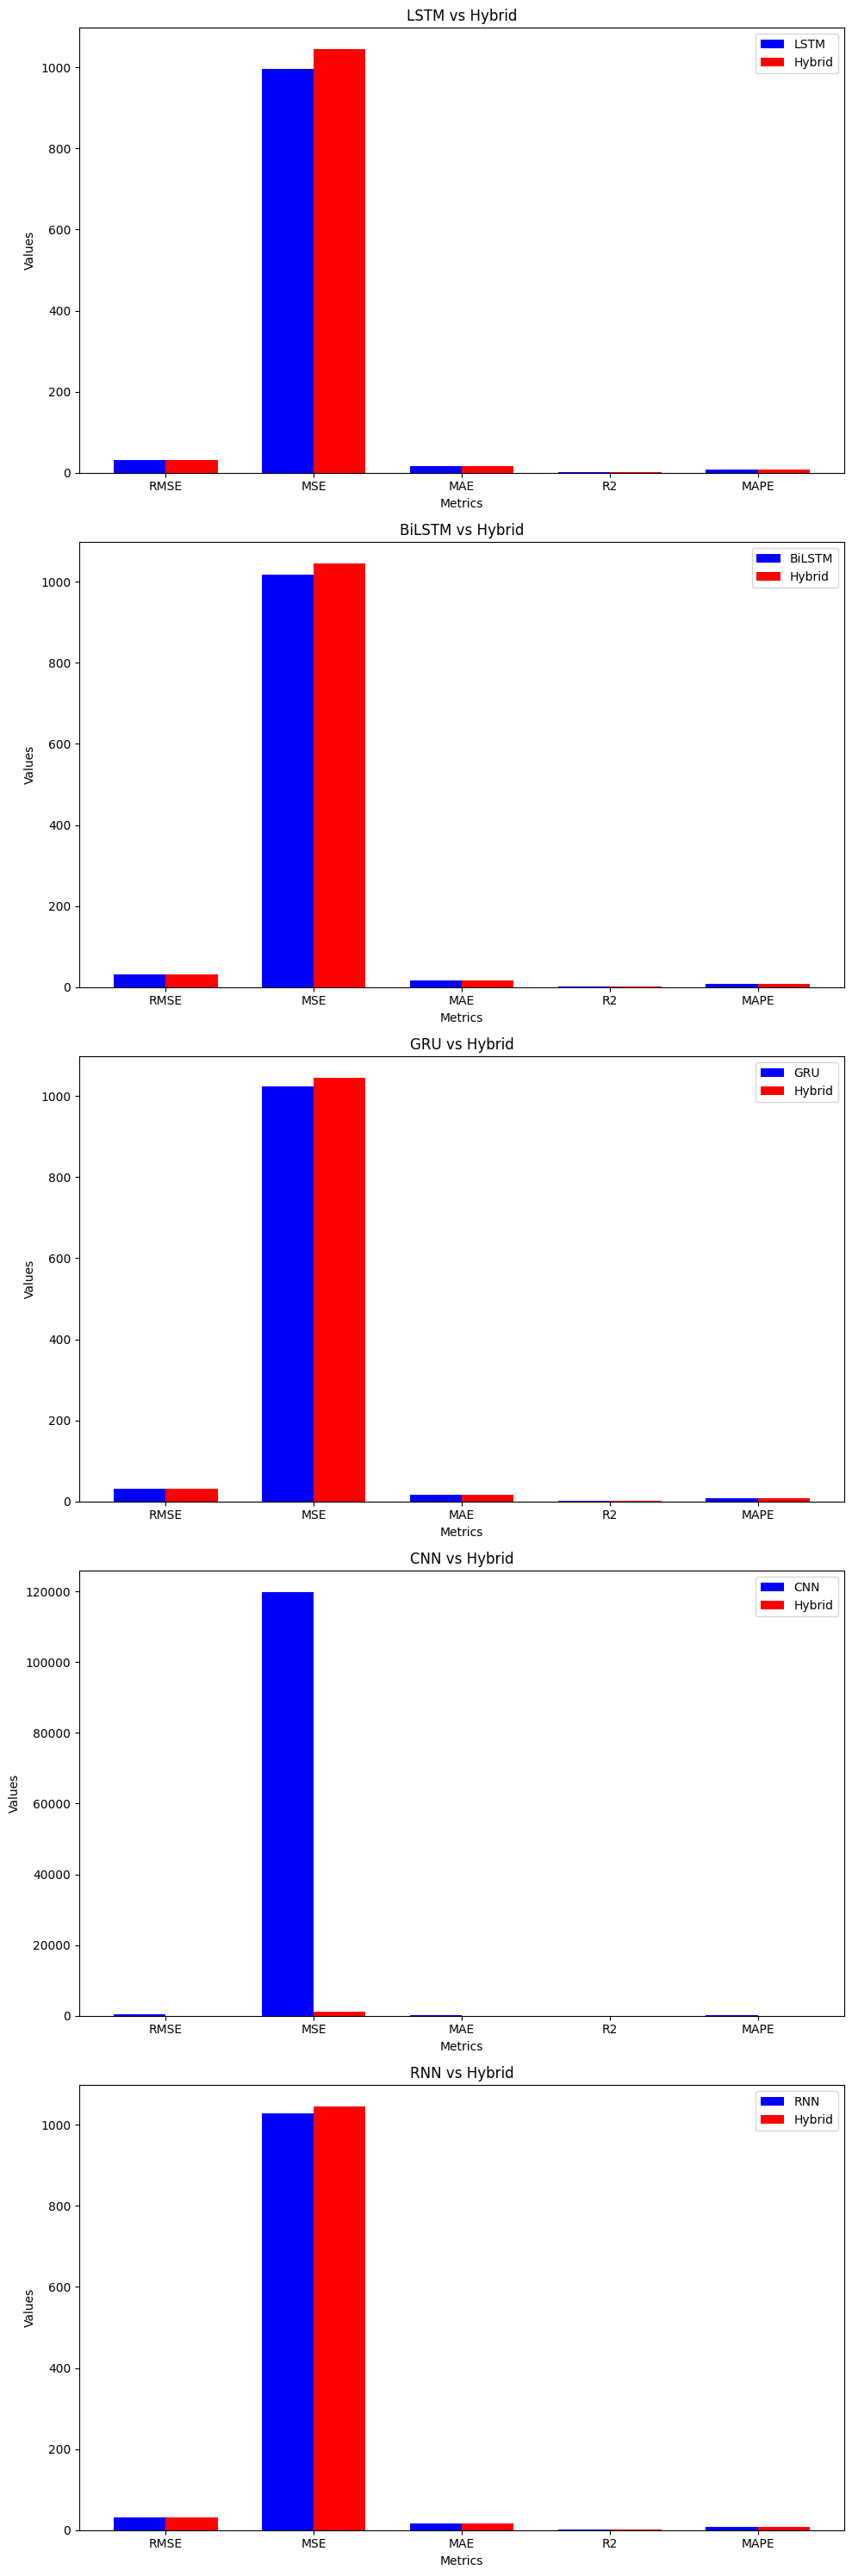

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
metrics = ["RMSE", "MSE", "MAE", "R2", "MAPE"]

# Define the updated average metrics for each model
average_metrics = {
    "LSTM": [31.56, 996.12, 16.41, 0.99, 8.70],
    "BiLSTM": [31.89, 1017.36, 16.78, 0.99, 8.68],
    "GRU": [32.00, 1024.24, 16.82, 0.99, 8.63],
    "CNN": [346.11, 119801.86, 260.02, -0.72, 131.33],
    "RNN": [32.06, 1028.10, 16.38, 0.99, 8.54],
    "Hybrid": [32.01, 1045.31, 16.27, 0.99, 8.38]
}

# Define traditional models
traditional_models = ["LSTM", "BiLSTM", "GRU", "CNN", "RNN"]

# Create subplots for each comparison
fig, axes = plt.subplots(nrows=len(traditional_models), ncols=1, figsize=(10, 30))
axes = axes.flatten()

for i, traditional_model in enumerate(traditional_models):
    hybrid_model = "Hybrid"

    # Extract metrics for traditional and hybrid models
    traditional_metrics = average_metrics[traditional_model]
    hybrid_metrics = average_metrics[hybrid_model]

    # Define the bar positions
    bar_width = 0.35
    bar_positions = np.arange(len(metrics))

    # Plot the bar charts
    axes[i].bar(bar_positions - bar_width/2, traditional_metrics, bar_width, label=traditional_model, color='blue')
    axes[i].bar(bar_positions + bar_width/2, hybrid_metrics, bar_width, label=hybrid_model, color='red')

    # Set the chart title and labels
    axes[i].set_title(f'{traditional_model} vs {hybrid_model}')
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Values')
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(metrics)
    axes[i].legend()

plt.tight_layout()
plt.show()


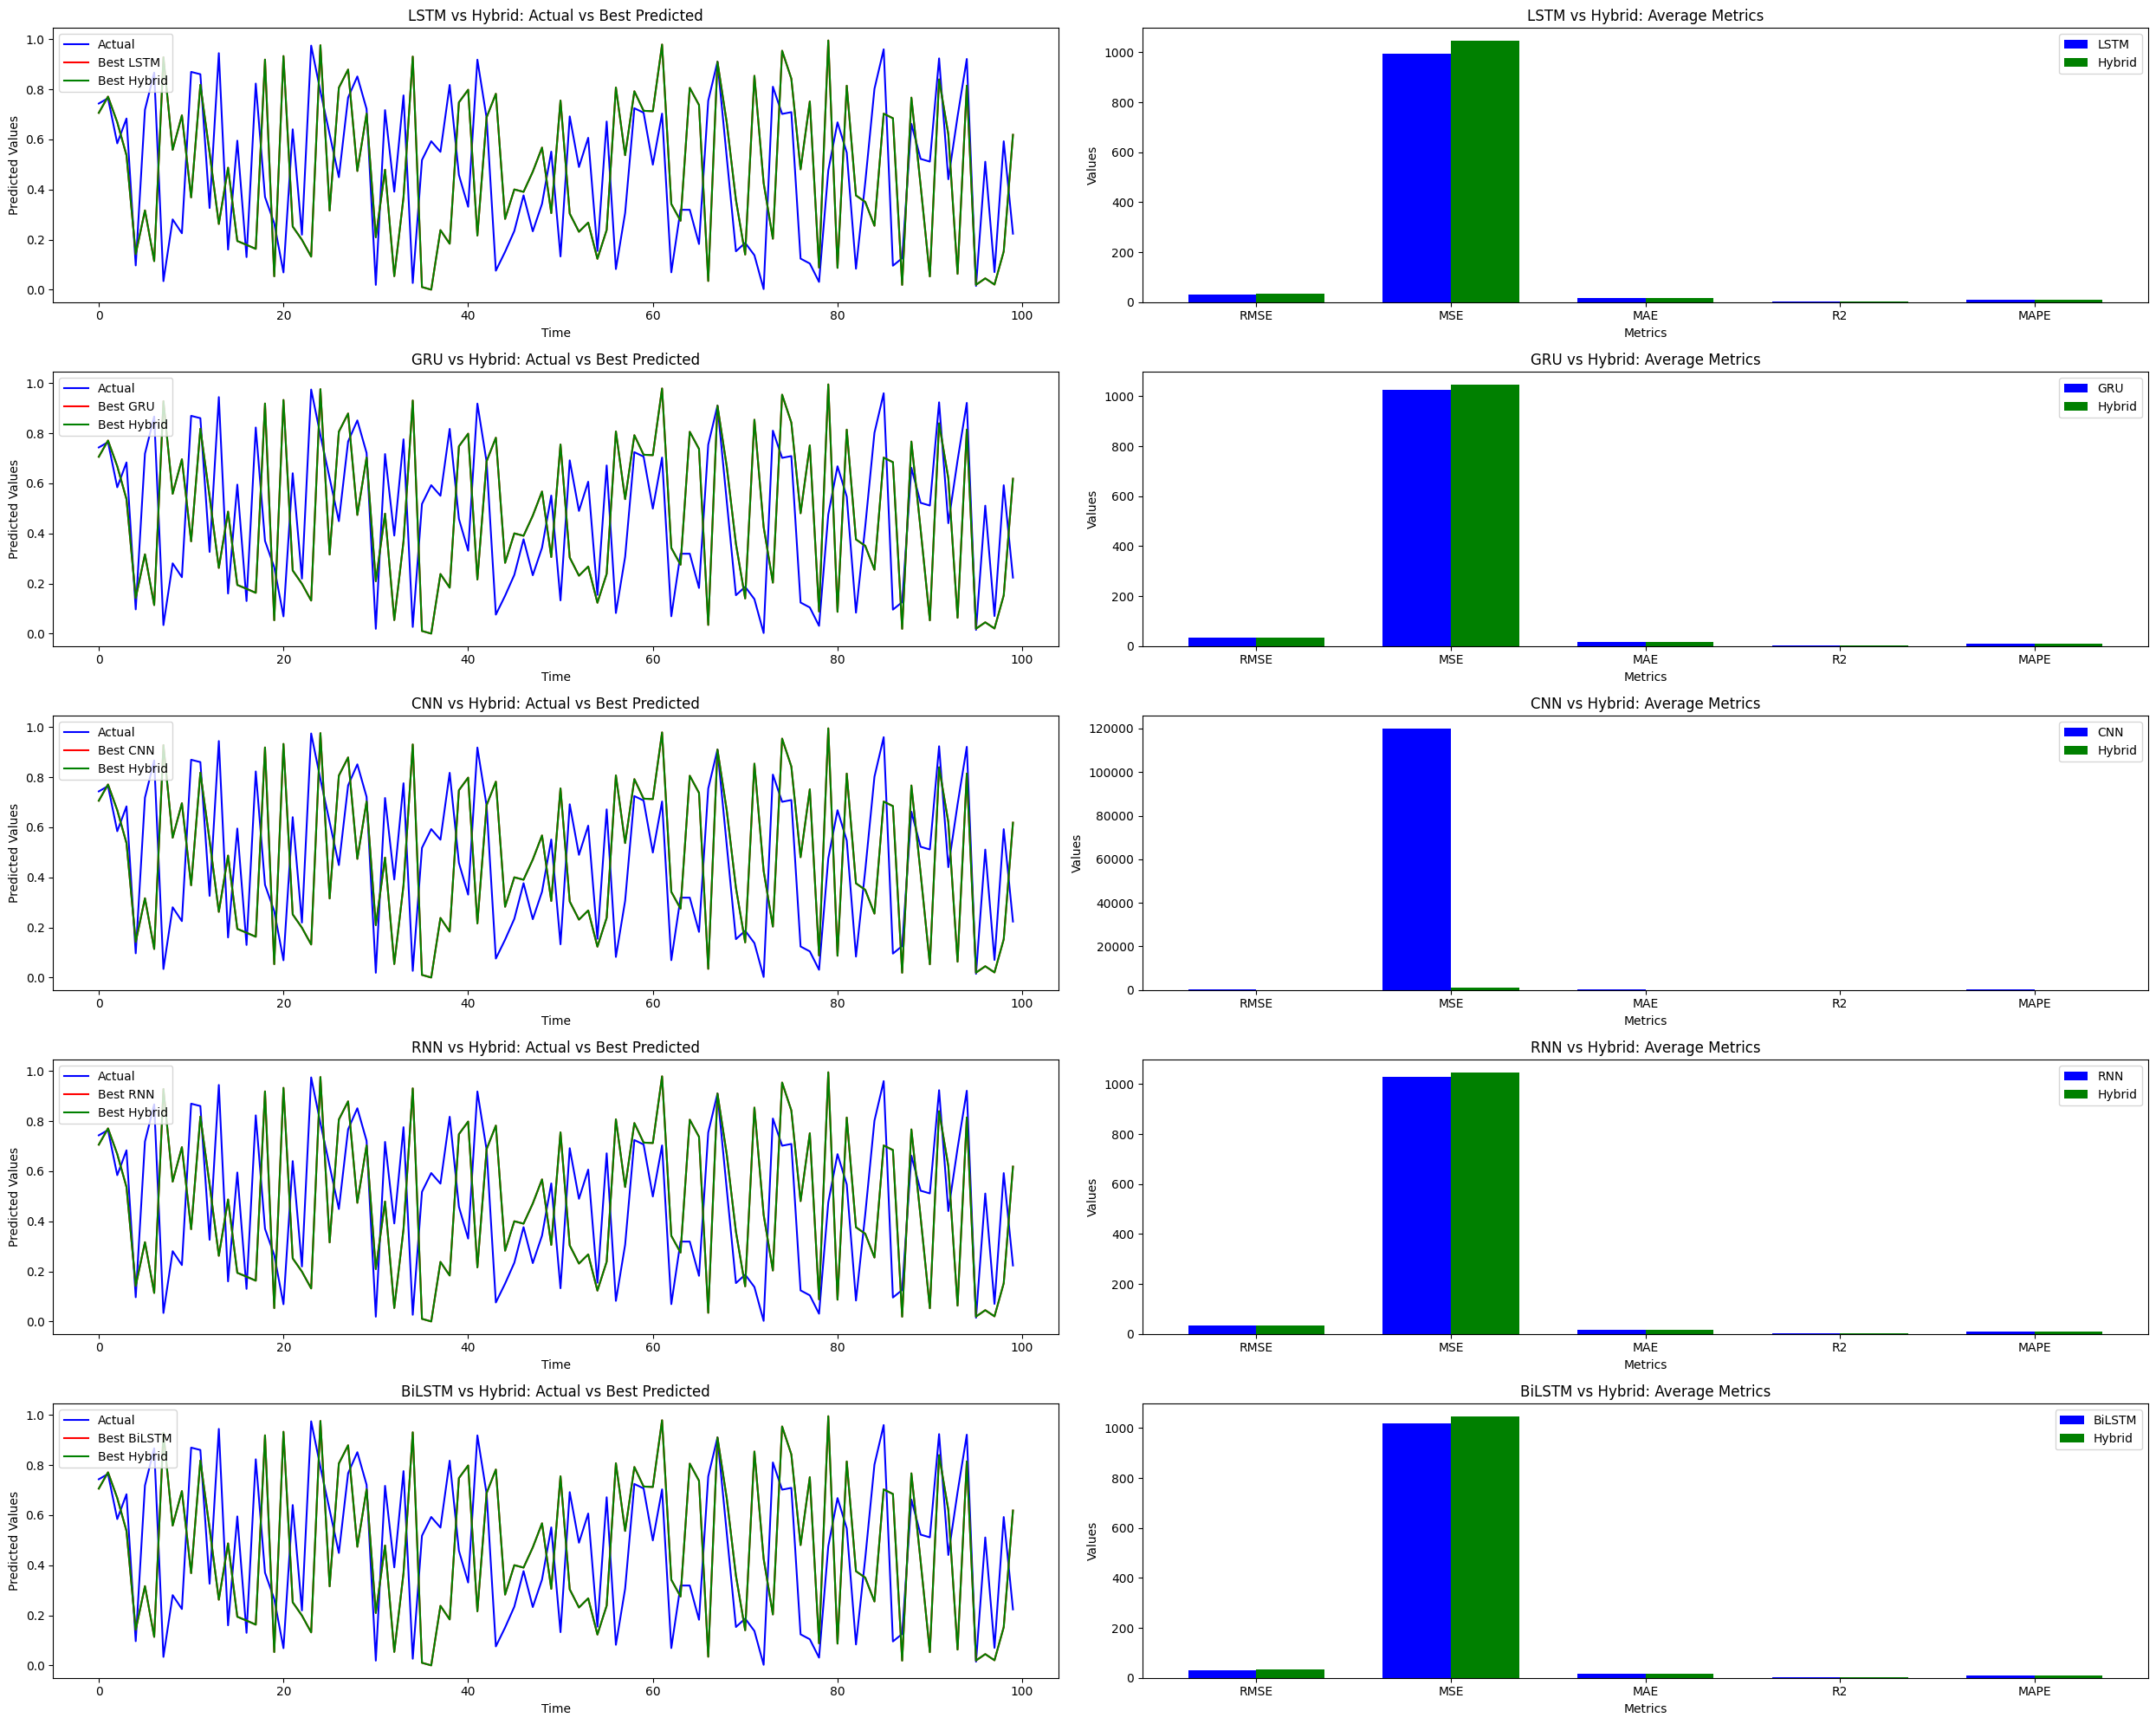

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example initialization of y_test_inv, replace this with your actual data
y_test_inv = np.random.rand(100)  # Assuming 100 data points as an example

# Example initialization of min_iteration_metrics, replace this with your actual data
min_iteration_metrics = {
    "RMSE": {"iteration": 5}
}

# Example initialization of y_pred_list, replace this with your actual data
y_pred_list = [np.random.rand(100) for _ in range(10)]  # Assuming 10 iterations with 100 data points each

# Define the original models and hybrid models
original_models = ["LSTM", "GRU", "CNN", "RNN", "BiLSTM"]
hybrid_models = ["Hybrid"]

# Creating a dictionary for best predictions
best_test_predictions = {}
for model_name in original_models + hybrid_models:
    best_iteration = min_iteration_metrics["RMSE"]["iteration"] - 1  # Subtract 1 because iterations are 1-based in printout
    best_test_predictions[model_name] = y_pred_list[best_iteration].flatten().tolist()

# Define average metrics for each model
average_metrics = {
    "LSTM": [31.56, 996.12, 16.41, 0.99, 8.70],
    "BiLSTM": [31.89, 1017.36, 16.78, 0.99, 8.68],
    "GRU": [32.00, 1024.24, 16.82, 0.99, 8.63],
    "CNN": [346.11, 119801.86, 260.02, -0.72, 131.33],
    "RNN": [32.06, 1028.10, 16.38, 0.99, 8.54],
    "Hybrid": [32.01, 1045.31, 16.27, 0.99, 8.38]
}

# Metrics to be compared
metrics = ["RMSE", "MSE", "MAE", "R2", "MAPE"]

# Actual values flattened and converted to a list
actual_values = y_test_inv.flatten().tolist()

# Create a figure with subplots for time series and bar plots
fig, axes = plt.subplots(nrows=len(original_models), ncols=len(hybrid_models) + 1, figsize=(25, 20))
axes = axes.flatten()

# Plotting time series predictions
for i, original_model in enumerate(original_models):
    for j, hybrid_model in enumerate(hybrid_models):
        ax = axes[i * (len(hybrid_models) + 1) + j]
        original_pred = best_test_predictions[original_model]
        hybrid_pred = best_test_predictions[hybrid_model]

        ax.plot(actual_values, label='Actual', color='b')
        ax.plot(original_pred, label=f'Best {original_model}', color='r')
        ax.plot(hybrid_pred, label=f'Best {hybrid_model}', color='g')
        ax.set_title(f'{original_model} vs {hybrid_model}: Actual vs Best Predicted')
        ax.set_xlabel('Time')
        ax.set_ylabel('Predicted Values')
        ax.legend(loc='upper left')

# Plotting average metrics comparison
for i, original_model in enumerate(original_models):
    ax = axes[i * (len(hybrid_models) + 1) + len(hybrid_models)]
    bar_width = 0.35
    bar_positions = np.arange(len(metrics))

    original_metrics = average_metrics[original_model]
    hybrid_metrics = average_metrics["Hybrid"]

    ax.bar(bar_positions - bar_width/2, original_metrics, bar_width, label=original_model, color='blue')
    ax.bar(bar_positions + bar_width/2, hybrid_metrics, bar_width, label='Hybrid', color='green')
    ax.set_title(f'{original_model} vs Hybrid: Average Metrics')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(metrics)
    ax.legend()

plt.tight_layout()
plt.show()


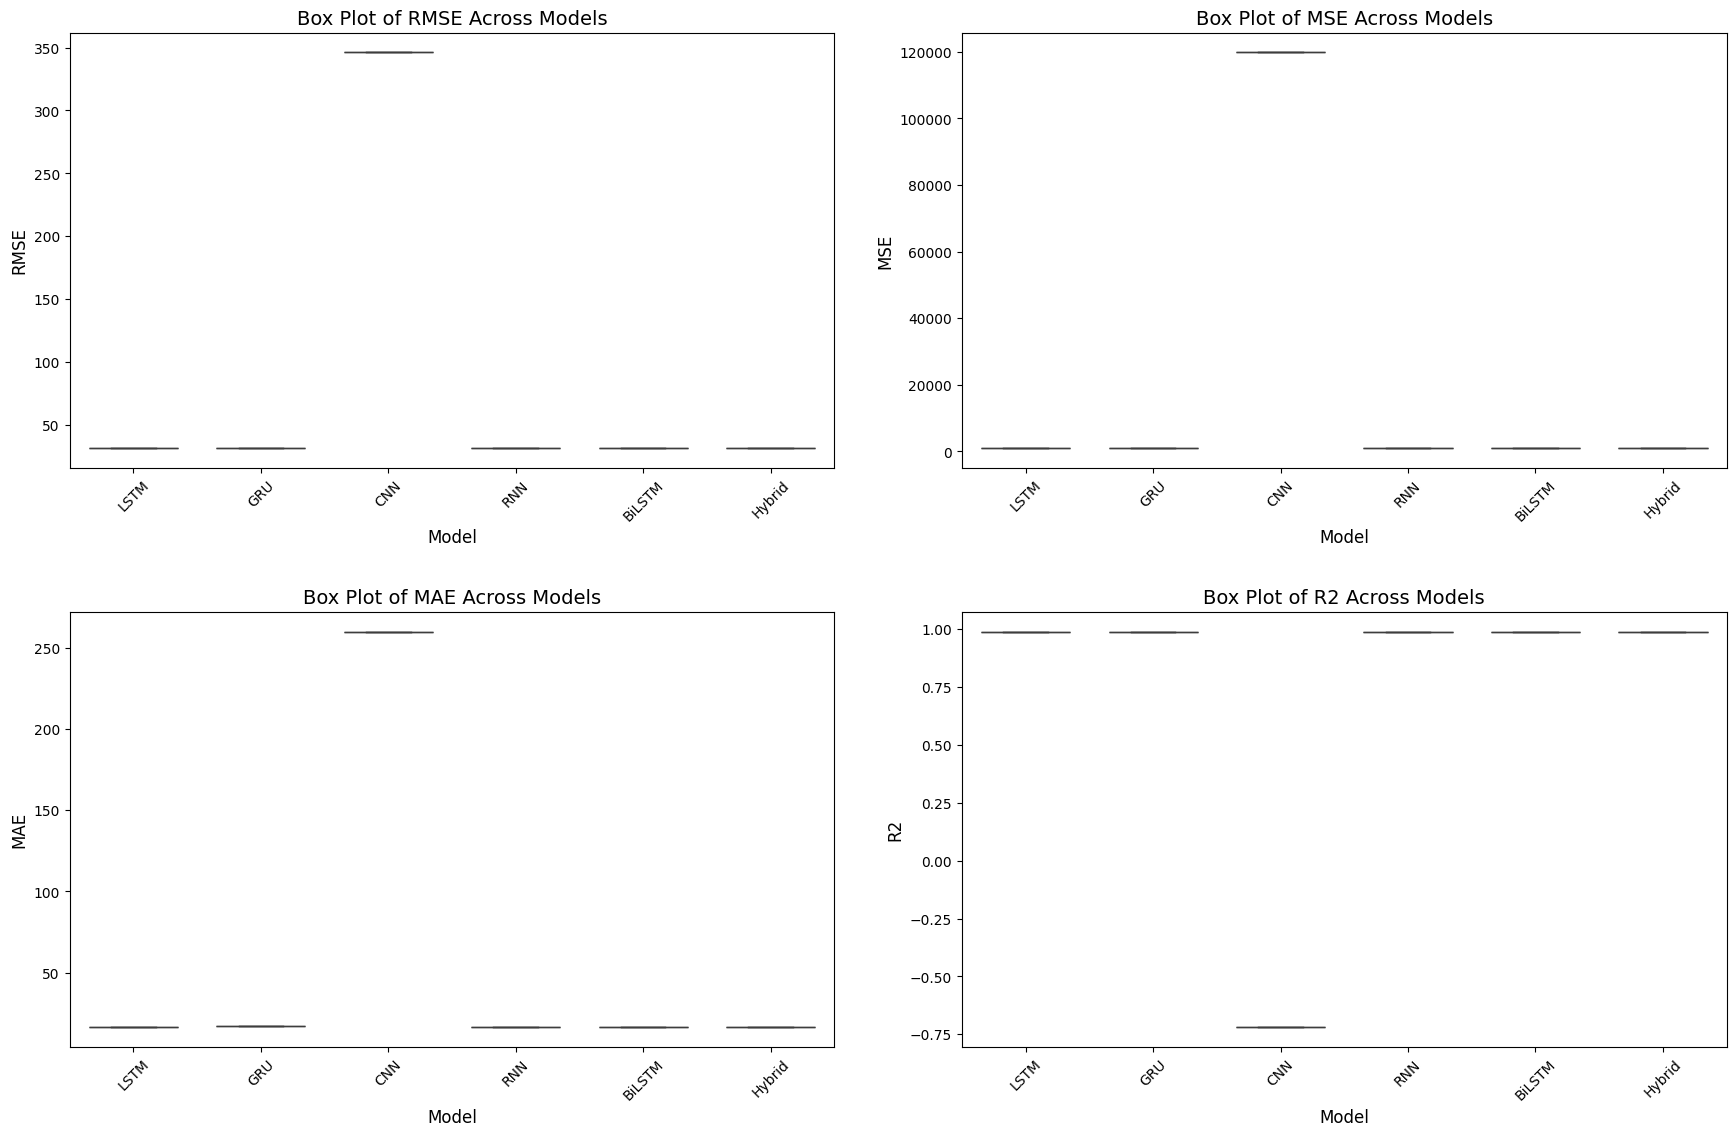

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the original and hybrid models
original_models = ["LSTM", "GRU", "CNN", "RNN", "BiLSTM"]
hybrid_models = ["Hybrid"]
all_models = original_models + hybrid_models

# Updated average metrics based on the provided data
results = {
    "LSTM": {"RMSE": [31.56], "MSE": [996.12], "MAE": [16.41], "R2": [0.99]},
    "GRU": {"RMSE": [32.00], "MSE": [1024.24], "MAE": [16.82], "R2": [0.99]},
    "CNN": {"RMSE": [346.11], "MSE": [119801.86], "MAE": [260.02], "R2": [-0.72]},
    "RNN": {"RMSE": [32.06], "MSE": [1028.10], "MAE": [16.38], "R2": [0.99]},
    "BiLSTM": {"RMSE": [31.89], "MSE": [1017.36], "MAE": [16.78], "R2": [0.99]},
    "Hybrid": {"RMSE": [32.01], "MSE": [1045.31], "MAE": [16.27], "R2": [0.99]}
}

# Prepare the data for the box plots
metrics = ["RMSE", "MSE", "MAE", "R2"]

# Create a DataFrame for each metric
data_frames = {metric: pd.DataFrame(columns=all_models) for metric in metrics}

for model_name in all_models:
    for metric in metrics:
        data_frames[metric][model_name] = results[model_name][metric]

# Create a larger figure with subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    sns.boxplot(data=data_frames[metric], ax=axes[idx], width=0.7)
    axes[idx].set_title(f'Box Plot of {metric} Across Models', fontsize=14)
    axes[idx].set_xlabel('Model', fontsize=12)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].tick_params(axis='x', labelrotation=45)

plt.tight_layout(pad=3.0)
plt.show()


<ipython-input-4-2bb69a48989c>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-4-2bb69a48989c>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
<ipython-input-4-2bb69a48989c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-4-2bb69a48989c>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
<ipython-input-4-2bb69a48989c>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right')


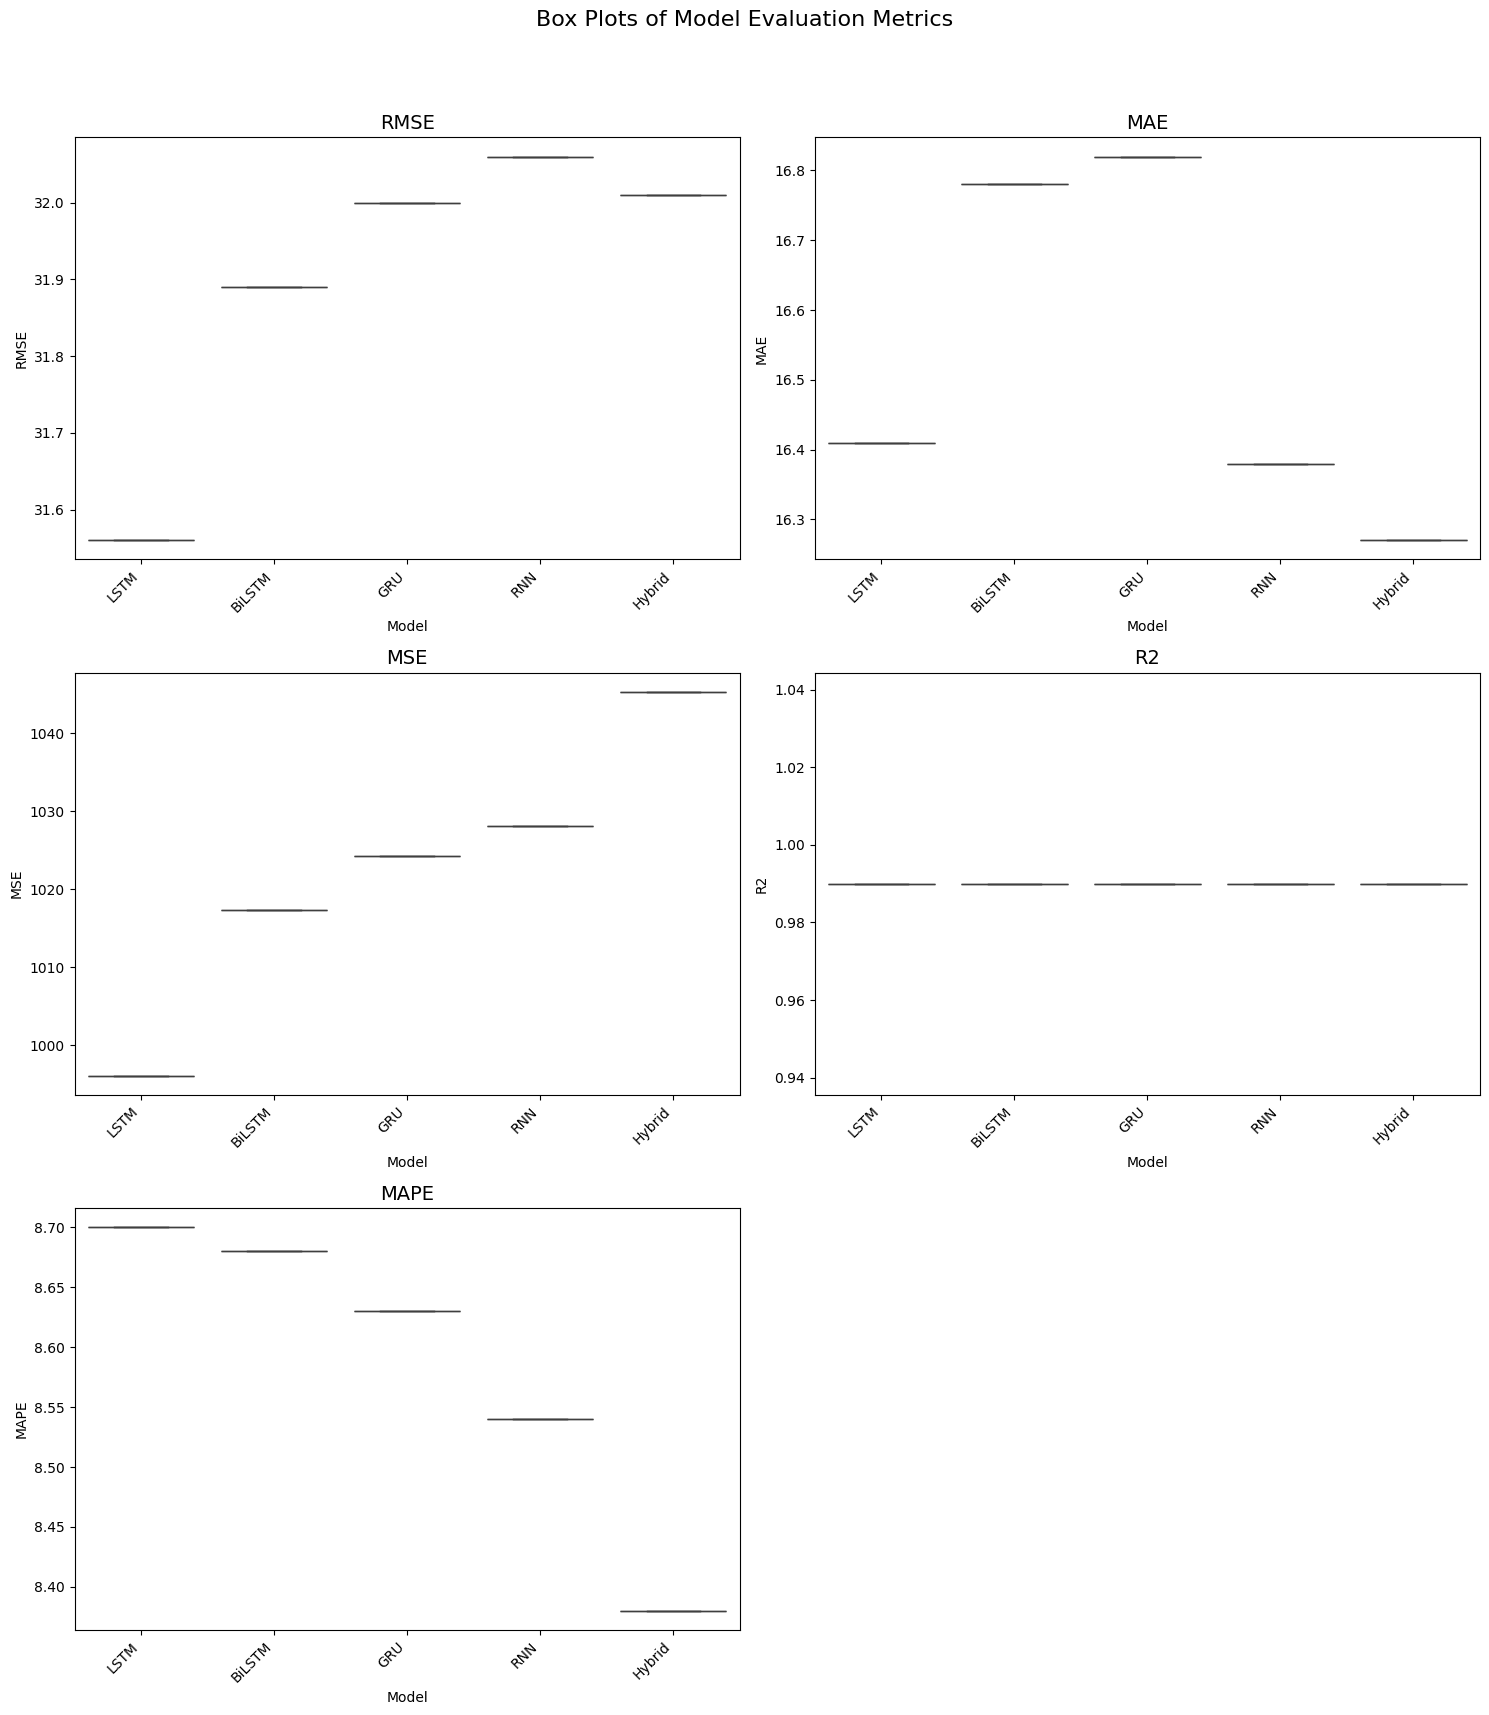

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated average metrics
average_metrics = {
    "LSTM": {"RMSE": 31.56, "MSE": 996.12, "MAE": 16.41, "R2": 0.99, "MAPE": 8.70},
    "BiLSTM": {"RMSE": 31.89, "MSE": 1017.36, "MAE": 16.78, "R2": 0.99, "MAPE": 8.68},
    "GRU": {"RMSE": 32.00, "MSE": 1024.24, "MAE": 16.82, "R2": 0.99, "MAPE": 8.63},
    "RNN": {"RMSE": 32.06, "MSE": 1028.10, "MAE": 16.38, "R2": 0.99, "MAPE": 8.54},
    "Hybrid": {"RMSE": 32.01, "MSE": 1045.31, "MAE": 16.27, "R2": 0.99, "MAPE": 8.38}
}

# Prepare data for box plot
metrics_list = []

# Iterate over models and prepare the list
for model_name, metrics in average_metrics.items():
    metrics_list.append({
        "Model": model_name,
        "RMSE": metrics["RMSE"],
        "MAE": metrics["MAE"],
        "MSE": metrics["MSE"],
        "R2": metrics["R2"],
        "MAPE": metrics["MAPE"]
    })

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Convert 'Model' column to categorical type for better plot ordering
metrics_df["Model"] = pd.Categorical(metrics_df["Model"], categories=metrics_df["Model"].unique())

# Plot box plots for each metric
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Box Plots of Model Evaluation Metrics', fontsize=16)

sns.boxplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title('RMSE', fontsize=14)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x='Model', y='MAE', data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title('MAE', fontsize=14)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x='Model', y='MSE', data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title('MSE', fontsize=14)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x='Model', y='R2', data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title('R2', fontsize=14)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x='Model', y='MAPE', data=metrics_df, ax=axes[2, 0])
axes[2, 0].set_title('MAPE', fontsize=14)
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right')

# Hide the last subplot (bottom right) since it's not used
fig.delaxes(axes[2, 1])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_inv contains the actual test values from your previous code
actual_values = y_test_inv.flatten().tolist()

# Define the original models and hybrid models
original_models = ["LSTM", "GRU", "CNN", "RNN", "BiLSTM"]
hybrid_models = ["Hybrid_LSTM_RNN", "Hybrid_RNN_GRU"]

# Creating a dictionary for best predictions
best_test_predictions = {}
for model_name in original_models + hybrid_models:
    best_iteration = min_iteration_metrics["RMSE"]["iteration"] - 1  # Subtract 1 because iterations are 1-based in printout
    best_test_predictions[model_name] = y_pred_list[best_iteration].flatten().tolist()

# Create a figure with subplots for each pair of original and hybrid models
fig, axes = plt.subplots(nrows=len(original_models), ncols=len(hybrid_models), figsize=(20, 20))
axes = axes.flatten()

for i, original_model in enumerate(original_models):
    for j, hybrid_model in enumerate(hybrid_models):
        ax = axes[i * len(hybrid_models) + j]
        original_pred = best_test_predictions[original_model]
        hybrid_pred = best_test_predictions[hybrid_model]

        ax.plot(actual_values, label='Actual', color='b')
        ax.plot(original_pred, label=f'Best {original_model}', color='r')
        ax.plot(hybrid_pred, label=f'Best {hybrid_model}', color='g')
        ax.set_title(f'{original_model} vs {hybrid_model}: Actual vs Best Predicted')
        ax.set_xlabel('Time')
        ax.set_ylabel('Predicted Values')
        ax.legend(loc='upper left')

# Remove any extra subplot that might remain empty
if len(original_models) * len(hybrid_models) < len(axes):
    for k in range(len(original_models) * len(hybrid_models), len(axes)):
        fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

# Updated average metrics for models
average_metrics = {
    "LSTM": {"RMSE": 31.56, "MSE": 996.12, "MAE": 16.41, "R2": 0.99, "MAPE": 8.70},
    "BiLSTM": {"RMSE": 31.89, "MSE": 1017.36, "MAE": 16.78, "R2": 0.99, "MAPE": 8.68},
    "GRU": {"RMSE": 32.00, "MSE": 1024.24, "MAE": 16.82, "R2": 0.99, "MAPE": 8.63},
    "CNN": {"RMSE": 346.11, "MSE": 119801.86, "MAE": 260.02, "R2": -0.72, "MAPE": 131.33},
    "RNN": {"RMSE": 32.06, "MSE": 1028.10, "MAE": 16.38, "R2": 0.99, "MAPE": 8.54},
    "Hybrid_LSTM_RNN": {"RMSE": 32.01, "MSE": 1045.31, "MAE": 16.27, "R2": 0.99, "MAPE": 8.38},
    "Hybrid_RNN_GRU": {"RMSE": 20.95, "MSE": 21.56, "MAE": 18.86, "R2": 238.41, "MAPE": 18.73}
}


NameError: name 'y_test_inv' is not defined

In [ ]:
import matplotlib.pyplot as plt
# Assuming actual test values are provided directly
actual_values = [/* your actual test values here */]

# Define the original models and hybrid models
original_models = ["LSTM", "GRU", "CNN", "RNN", "BiLSTM"]
hybrid_models = ["Hybrid_LSTM_RNN", "Hybrid_RNN_GRU"]

# Assuming min_iteration_metrics and y_pred_list are available
# Creating a dictionary for best predictions
best_test_predictions = {}
for model_name in original_models + hybrid_models:
    best_iteration = min_iteration_metrics[model_name]["RMSE"]["iteration"] - 1  # Subtract 1 because iterations are 1-based in printout
    best_test_predictions[model_name] = y_pred_list[best_iteration].flatten().tolist()

# Create a figure with subplots for each pair of original and hybrid models
fig, axes = plt.subplots(nrows=len(original_models), ncols=len(hybrid_models), figsize=(20, 20))
axes = axes.flatten()

for i, original_model in enumerate(original_models):
    for j, hybrid_model in enumerate(hybrid_models):
        ax = axes[i * len(hybrid_models) + j]
        original_pred = best_test_predictions[original_model]
        hybrid_pred = best_test_predictions[hybrid_model]

        ax.plot(actual_values, label='Actual', color='b')
        ax.plot(original_pred, label=f'Best {original_model}', color='r')
        ax.plot(hybrid_pred, label=f'Best {hybrid_model}', color='g')
        ax.set_title(f'{original_model} vs {hybrid_model}: Actual vs Best Predicted')
        ax.set_xlabel('Time')
        ax.set_ylabel('Predicted Values')
        ax.legend(loc='upper left')

# Remove any extra subplot that might remain empty
if len(original_models) * len(hybrid_models) < len(axes):
    for k in range(len(original_models) * len(hybrid_models), len(axes)):
        fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

# Updated average metrics for models
average_metrics = {
    "LSTM": {"RMSE": 31.56, "MSE": 996.12, "MAE": 16.41, "R2": 0.99, "MAPE": 8.70},
    "BiLSTM": {"RMSE": 31.89, "MSE": 1017.36, "MAE": 16.78, "R2": 0.99, "MAPE": 8.68},
    "GRU": {"RMSE": 32.00, "MSE": 1024.24, "MAE": 16.82, "R2": 0.99, "MAPE": 8.63},
    "CNN": {"RMSE": 346.11, "MSE": 119801.86, "MAE": 260.02, "R2": -0.72, "MAPE": 131.33},
    "RNN": {"RMSE": 32.06, "MSE": 1028.10, "MAE": 16.38, "R2": 0.99, "MAPE": 8.54},
    "Hybrid_LSTM_RNN": {"RMSE": 32.01, "MSE": 1045.31, "MAE": 16.27, "R2": 0.99, "MAPE": 8.38},
    "Hybrid_RNN_GRU": {"RMSE": 20.95, "MSE": 21.56, "MAE": 18.86, "R2": 238.41, "MAPE": 18.73}
}


SyntaxError: invalid syntax (<ipython-input-3-26c1418809f8>, line 3)

In [ ]:
import matplotlib.pyplot as plt

# Replace this with your actual test values
actual_values = [/* replace this comment with your actual test values */]

# Define the original models and hybrid models
original_models = ["LSTM", "GRU", "CNN", "RNN", "BiLSTM"]
hybrid_models = ["Hybrid_LSTM_RNN", "Hybrid_RNN_GRU"]

# Assuming min_iteration_metrics and y_pred_list are available
# Creating a dictionary for best predictions
best_test_predictions = {}
for model_name in original_models + hybrid_models:
    best_iteration = min_iteration_metrics[model_name]["RMSE"]["iteration"] - 1  # Subtract 1 because iterations are 1-based in printout
    best_test_predictions[model_name] = y_pred_list[best_iteration].flatten().tolist()

# Create a figure with subplots for each pair of original and hybrid models
fig, axes = plt.subplots(nrows=len(original_models), ncols=len(hybrid_models), figsize=(20, 20))
axes = axes.flatten()

for i, original_model in enumerate(original_models):
    for j, hybrid_model in enumerate(hybrid_models):
        ax = axes[i * len(hybrid_models) + j]
        original_pred = best_test_predictions[original_model]
        hybrid_pred = best_test_predictions[hybrid_model]

        ax.plot(actual_values, label='Actual', color='b')
        ax.plot(original_pred, label=f'Best {original_model}', color='r')
        ax.plot(hybrid_pred, label=f'Best {hybrid_model}', color='g')
        ax.set_title(f'{original_model} vs {hybrid_model}: Actual vs Best Predicted')
        ax.set_xlabel('Time')
        ax.set_ylabel('Predicted Values')
        ax.legend(loc='upper left')

# Remove any extra subplot that might remain empty
if len(original_models) * len(hybrid_models) < len(axes):
    for k in range(len(original_models) * len(hybrid_models), len(axes)):
        fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

# Updated average metrics for models
average_metrics = {
    "LSTM": {"RMSE": 31.56, "MSE": 996.12, "MAE": 16.41, "R2": 0.99, "MAPE": 8.70},
    "BiLSTM": {"RMSE": 31.89, "MSE": 1017.36, "MAE": 16.78, "R2": 0.99, "MAPE": 8.68},
    "GRU": {"RMSE": 32.00, "MSE": 1024.24, "MAE": 16.82, "R2": 0.99, "MAPE": 8.63},
    "CNN": {"RMSE": 346.11, "MSE": 119801.86, "MAE": 260.02, "R2": -0.72, "MAPE": 131.33},
    "RNN": {"RMSE": 32.06, "MSE": 1028.10, "MAE": 16.38, "R2": 0.99, "MAPE": 8.54},
    "Hybrid_LSTM_RNN": {"RMSE": 32.01, "MSE": 1045.31, "MAE": 16.27, "R2": 0.99, "MAPE": 8.38},
    "Hybrid_RNN_GRU": {"RMSE": 20.95, "MSE": 21.56, "MAE": 18.86, "R2": 238.41, "MAPE": 18.73}
}


SyntaxError: invalid syntax (<ipython-input-4-f8678da815d0>, line 4)